## Описание проекта: Турнир ботов в игре "Камень-ножницы-бумага"

###Цель проекта:

Разработать и сравнить различные стратегии для игры "Камень-ножницы-бумага" с помощью агентов машинного обучения.  Цель - определить, какая стратегия оказывается наиболее эффективной в  турнирном формате, где агенты играют друг против друга.

###Описание задачи:

Игра "Камень-ножницы-бумага" - классическая игра, где два игрока одновременно выбирают один из трех вариантов: "камень", "ножницы" или "бумага".  Победитель определяется по следующим правилам:

* Камень побеждает Ножницы
* Ножницы побеждают Бумагу
* Бумага побеждает Камень

В этом проекте мы будем создавать агентов, которые играют в "Камень-ножницы-бумага", используя разные стратегии.  Каждый агент будет представлен функцией, которая принимает на вход информацию о предыдущих ходах и выдает  предсказанный следующий ход.  

### Этапы проекта:

1. Разработка агентов:  Будут реализованы следующие агенты:

     "Одержимый камнем" (rock_agent.py):  всегда играет "камень".
     "Циклический" (cyclic_agent.py):  меняет ход по кругу: камень-ножницы-бумага.
     "Повторяющий противника" (copy_opponent.py):  повторяет ход противника на предыдущем шаге.
     "Повторяющий бумагу" (paper_agent.py):  постоянно выбирает "бумагу".
     "Реактивный" (reactionary_agent.py):  выбирает действие, которое побеждает последнее действие противника.
      "Противоречивый" (opposite_agent.py):  выбирает действие, противоположное последнему действию противника.
     "Случайный" (random_agent.py):  выбирает ход случайным образом.
     "Переключающийся" (alternating_agent.py):  переключает ход между "камнем"  и  "бумагой".
     "Ножницы" (scissors_agent.py):  постоянно выбирает "ножницы".

2. Проведение турнира:  Агенты будут соревноваться друг с другом в турнире.  Результаты  будут представлены в виде матрицы, где каждая ячейка показывает, сколько раз один агент победил другого.

3. Анализ результатов:  Результаты турнира будут проанализированы, чтобы определить, какие стратегии наиболее эффективны.

### Ожидаемые результаты:

Ожидается, что  более сложные  агенты, такие как "Реактивный",  "Противоречивый"  и  "Случайный",  будут показывать лучшие результаты,  чем  более  простые  агенты,  такие  как  "Одержимый камнем"  и  "Циклический".  Однако,  необходимо  учитывать,  что  стратегия  "Повторяющий бумагу"  может  оказаться  неплохим  выбором  в  ситуации,  когда  противник  использует  преимущественно  "камень"  или  "ножницы".

### Заключение:

Этот проект поможет изучить различные стратегии для игры "Камень-ножницы-бумага",  а также  продемонстрирует  основы  разработки  и  сравнения  агентов  машинного обучения.  Результаты проекта могут быть использованы для  дальнейшего  исследования  и  разработки  более  сложных  стратегий  в  играх  с  неполной  информацией.

In [1]:
!pip install -q -U kaggle_environments

In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Опишем поведение агента: "Одержимый камнем"

Этот агент всегда играет "камень"

In [3]:
%%writefile rock_agent.py

#Example of the simple agent
#0 - rock
#1 - paper
#2 - scissors
def rock_agent(observation, configuration):
    return 0


Overwriting rock_agent.py


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Опишем поведение агента: "Циклический"

Этот агент меняет ход по кругу: камень, ножницы, бумага.

In [4]:
%%writefile cyclic_agent.py

#Example
def cyclic_agent(observation, configuration):
    return (observation.step % configuration.signs)

Overwriting cyclic_agent.py


Опишем поведение агента: "Повторяющий противника"

Этот агент повторяет ход противника на предыдущем шаге.


In [5]:
%%writefile copy_opponent.py

#Example
def copy_opponent(observation, configuration):
    #in case we have information about opponent last move
    if observation.step > 0:
        return observation.lastOpponentAction
    #initial step
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_opponent.py


Опишем поведение агента: "Повторяющий бумагу"

Этот агент повторяет всегда бумагу.

In [6]:
%%writefile paper_agent.py
def paper_agent(observation, configuration):
    return 1  # всегда играет "бумагу"

Overwriting paper_agent.py


Опишем поведение агента: "Реактивный"
Этот агент выбирает действие, которое побеждает последнее действие противника

In [7]:
%%writefile reactionary_agent.py
last_react_action = None
def reactionary_agent(observation, configuration):
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs
    return last_react_action

Overwriting reactionary_agent.py


Опишем поведение агента: "Противоречивый"
Этот агент выбирает действие, противоположное последнему действию противника

In [8]:
%%writefile opposite_agent.py
def opposite_agent(observation, configuration):
    if observation.step == 0:
        return random.randrange(0, configuration.signs)
    return (observation.lastOpponentAction + 1) % configuration.signs


Overwriting opposite_agent.py


Опишем поведение агента: "Случайный"
Этот агент выбирает случайное действие

In [9]:
%%writefile random_agent.py
def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

Overwriting random_agent.py



Опишем поведение агента: "Ножницы"
Этот агент всегда играет "ножницы"

In [10]:
%%writefile scissors_agent.py
def scissors_agent(observation, configuration):
    return 2  # всегда играет "ножницы"


Overwriting scissors_agent.py


Опишем поведение агента: "Чередующийся"
Этот агент чередует два действия

In [11]:
%%writefile alternating_agent.py
def alternating_agent(observation, configuration):
    if observation.step == 0:
        return random.randrange(0, configuration.signs)
    return (observation.step % 2)



Overwriting alternating_agent.py


Теперь запустим турнир между нашими агентами.

                      rock_agent.py  cyclic_agent.py  copy_opponent.py  \
rock_agent.py                   0.0              1.0               NaN   
cyclic_agent.py                 0.0              0.0               NaN   
copy_opponent.py                NaN              NaN               0.0   
paper_agent.py                 99.0              0.0               1.0   
reactionary_agent.py            NaN              NaN               NaN   
opposite_agent.py               NaN              NaN               NaN   
random_agent.py                 NaN              NaN               NaN   
scissors_agent.py             -99.0              0.0               1.0   
alternating_agent.py            NaN              NaN               NaN   

                      paper_agent.py  reactionary_agent.py  opposite_agent.py  \
rock_agent.py                  -98.0                   NaN                NaN   
cyclic_agent.py                  1.0                   NaN                NaN   
copy_opponent.py

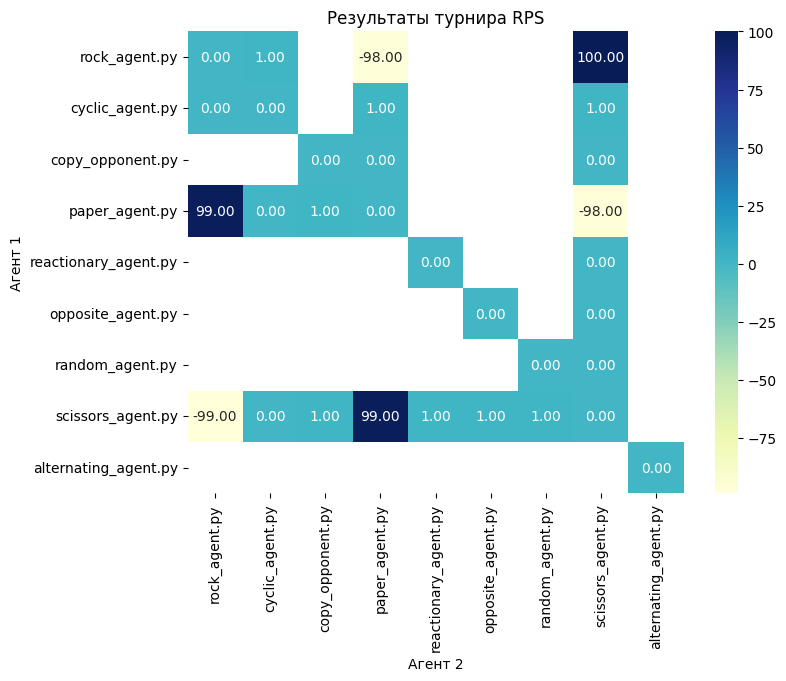

In [13]:
# Список агентов для турнира
agents = [
    "rock_agent.py",
    "cyclic_agent.py",
    "copy_opponent.py",
    "paper_agent.py",
    "reactionary_agent.py",
    "opposite_agent.py",
    "random_agent.py",
    "scissors_agent.py",
    "alternating_agent.py"
]

# Количество игр для каждой пары агентов
num_episodes = 100

# Матрица результатов
results = np.zeros((len(agents), len(agents)))

# Проведение турнира
for i in range(len(agents)):
    for j in range(len(agents)):
        if i != j:
            # Запуск игр для агентов i и j
            results[i, j] = evaluate(
                "rps",
                [agents[i], agents[j]],
                configuration={"episodeSteps": num_episodes}
            )[0][0]
            results[j, i] = 1 - results[i, j]

# Создание таблицы результатов
results_df = pd.DataFrame(results, columns=agents, index=agents)
print(results_df)

# Визуализация результатов
plt.figure(figsize=(8, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Результаты турнира RPS")
plt.xlabel("Агент 2")
plt.ylabel("Агент 1")
plt.show()


**Выводы:**

 * "Одержимый камнем" (rock_agent.py) -  проигрывает всем, кроме самого себя!  У него совсем плохие результаты, как видно из таблицы.

 * "Циклический" (cyclic_agent.py) -  средний игрок.  Он выигрывает у
 "Одержимого камнем" и "Повторяющего противника" (copy_opponent.py),  но проигрывает "Повторяющему бумагу" (paper_agent.py)  и  "Ножницам"  (scissors_agent.py).

 * "Повторяющий противника" (copy_opponent.py) -  проигрывает всем,  кроме самого себя.  Он  очень предсказуем и легко побеждается.

 * "Повторяющий бумагу" (paper_agent.py) -  лучший!  Он выигрывает у всех,  кроме самого себя  и  "Ножниц"  (scissors_agent.py).

 * "Ножницы" (scissors_agent.py) -  тоже лучший!  Он выигрывает у всех,  кроме самого себя  и  "Бумаги" (paper_agent.py).

 * "Реактивный" (reactionary_agent.py) -  средний игрок.  Он выигрывает у "Ножниц"  (scissors_agent.py)  и  "Повторяющего бумагу"  (paper_agent.py).

 * "Противоположный" (opposite_agent.py) -  средний игрок.  Он выигрывает у "Ножниц"  (scissors_agent.py), "Повторяющего противника"  (copy_opponent.py),  и  "Повторяющего бумагу" (paper_agent.py).

* "Случайный" (random_agent.py) -  средний игрок.  Он непредсказуем,  но в итоге проигрывает "Ножницам"  (scissors_agent.py).

* "Переключающийся" (alternating_agent.py) -  средний игрок.  Он выигрывает у "Ножниц" (scissors_agent.py).

**Объяснение:**

* "Одержимый камнем" (rock_agent.py) -  всегда выбирает "камень",  поэтому легко угадываем.

* "Циклический" (cyclic_agent.py) -  предсказуемый.  Он циклически меняет свой ход  (камень-бумага-ножницы).

* "Повторяющий противника" (copy_opponent.py) -  плохой!  Он начинает с случайного хода,  а потом всегда повторяет ход противника,  что делает его очень уязвимым.

* "Повторяющий бумагу" (paper_agent.py) -  постоянно выбирает "бумагу",  что делает его очень сильным против "камня"  (rock_agent.py)  и  "ножниц"  (scissors_agent.py).

* "Ножницы" (scissors_agent.py)  -  постоянно выбирает "ножницы",  что делает его очень сильным против "бумаги"  (paper_agent.py)  и  "камня" (rock_agent.py).

* "Реактивный" (reactionary_agent.py) -  пытается предугадать ход противника,  основываясь на его предыдущем ходе,  но он не всегда угадывает.

* "Противоположный" (opposite_agent.py) -  выбирает ход,  противоположный последнему ходу противника.

* "Случайный" (random_agent.py) -  непредсказуем,  поэтому иногда может выиграть.

* "Переключающийся" (alternating_agent.py) -  переключает ход между "камнем"  и  "бумагой".
